# National Climatic Data Center (NCDC)

## Reset and initialization

In [88]:
%reset -sf
from urllib.request import urlopen
import pandas as pd
#from pandas import read_csv, read_fwf, to_numeric, to_datetime, set_option
pd.set_option("display.max.columns", None)

url_type = 'ftp://anonymous@' 
url = 'ftp.ncei.noaa.gov'
daily = '/pub/data/ghcn/daily/'
yzip_url = url_type + url + daily + 'by_year/'
szip_url = url_type + url + daily + 'by_station/'

## List available years

In [89]:
with urlopen(yzip_url) as f:
    for bline in f.readlines():
        line = bline.decode('unicode-escape').rstrip('\r\n').split(' ')[-1]
        print(line)

1750.csv.gz
1763.csv.gz
1764.csv.gz
1765.csv.gz
1766.csv.gz
1767.csv.gz
1768.csv.gz
1769.csv.gz
1770.csv.gz
1771.csv.gz
1772.csv.gz
1773.csv.gz
1774.csv.gz
1775.csv.gz
1776.csv.gz
1777.csv.gz
1778.csv.gz
1779.csv.gz
1780.csv.gz
1781.csv.gz
1782.csv.gz
1783.csv.gz
1784.csv.gz
1785.csv.gz
1786.csv.gz
1787.csv.gz
1788.csv.gz
1789.csv.gz
1790.csv.gz
1791.csv.gz
1792.csv.gz
1793.csv.gz
1794.csv.gz
1795.csv.gz
1796.csv.gz
1797.csv.gz
1798.csv.gz
1799.csv.gz
1800.csv.gz
1801.csv.gz
1802.csv.gz
1803.csv.gz
1804.csv.gz
1805.csv.gz
1806.csv.gz
1807.csv.gz
1808.csv.gz
1809.csv.gz
1810.csv.gz
1811.csv.gz
1812.csv.gz
1813.csv.gz
1814.csv.gz
1815.csv.gz
1816.csv.gz
1817.csv.gz
1818.csv.gz
1819.csv.gz
1820.csv.gz
1821.csv.gz
1822.csv.gz
1823.csv.gz
1824.csv.gz
1825.csv.gz
1826.csv.gz
1827.csv.gz
1828.csv.gz
1829.csv.gz
1830.csv.gz
1831.csv.gz
1832.csv.gz
1833.csv.gz
1834.csv.gz
1835.csv.gz
1836.csv.gz
1837.csv.gz
1838.csv.gz
1839.csv.gz
1840.csv.gz
1841.csv.gz
1842.csv.gz
1843.csv.gz
1844.csv.gz
1845

## A) Display contents of readme-by_year.txt

In [90]:
print(urlopen(url_type+url+daily+'readme-by_year.txt').read().decode('utf-8'))

The "year".csv files contain all daily and station elements found in GHCN daily for the given year.  These 
files are updated daily for the entire period of record.

The following information serves as a definition of each field in one line of data covering one station-day. 
Each field described below is separated by a comma ( , ) and follows the order below:

ID = 11 character station identification code
YEAR/MONTH/DAY = 8 character date in YYYYMMDD format (e.g. 19860529 = May 29, 1986)
ELEMENT = 4 character indicator of element type 
DATA VALUE = 5 character data value for ELEMENT 
M-FLAG = 1 character Measurement Flag 
Q-FLAG = 1 character Quality Flag 
S-FLAG = 1 character Source Flag 
OBS-TIME = 4-character time of observation in hour-minute format (i.e. 0700 =7:00 am)

See section III of the GHCN-Daily readme.txt file (ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt)
for an explanation of ELEMENT codes and their units as well as the M-FLAG, Q-FLAG and S-FLAG.

The OBS-TIME

## B) Section III of the GHCN-Daily readme.txt

In [91]:
print(urlopen(url_type+url+daily+'readme.txt').read().decode('utf-8'))

README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) 
Version 3.29

--------------------------------------------------------------------------------
How to cite:

Note that the GHCN-Daily dataset itself now has a DOI (Digital Object Identifier)
so it may be relevant to cite both the methods/overview journal article as well 
as the specific version of the dataset used.

The journal article describing GHCN-Daily is:
Menne, M.J., I. Durre, R.S. Vose, B.E. Gleason, and T.G. Houston, 2012:  An overview 
of the Global Historical Climatology Network-Daily Database.  Journal of Atmospheric 
and Oceanic Technology, 29, 897-910, doi:10.1175/JTECH-D-11-00103.1.

To acknowledge the specific version of the dataset used, please cite:
Menne, M.J., I. Durre, B. Korzeniewski, S. McNeill, K. Thomas, X. Yin, S. Anthony, R. Ray, 
R.S. Vose, B.E.Gleason, and T.G. Houston, 2012: Global Historical Climatology Network - 
Daily (GHCN-Daily), Version 3. [indicate subset used following decima

## C) Display contents of readme-by_station.txt

In [92]:
print(urlopen(url_type+url+daily+'readme-by_station.txt').read().decode('utf-8'))

The "station".csv files contain all daily elements for that GHCN station for its entire period of record. 
Each element-day is provided on a separate line and all files are updated daily for the entire period of record.

The following information serves as a definition of each field for all element-day records. 
Each field described below is separated by a comma ( , ) and follows the order below:

ID = 11 character station identification code
YEAR/MONTH/DAY = 8 character date in YYYYMMDD format (e.g. 19860529 = May 29, 1986)
ELEMENT = 4 character indicator of element type 
DATA VALUE = 5 character data value for ELEMENT 
M-FLAG = 1 character Measurement Flag 
Q-FLAG = 1 character Quality Flag 
S-FLAG = 1 character Source Flag 
OBS-TIME = 4-character time of observation in hour-minute format (i.e. 0700 =7:00 am); if no ob time information 
is available, the field is left empty

See section III of the GHCN-Daily readme.txt file (ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt)
for

## List of country codes (FIPS) and names

In [93]:
#CODE          1-2    Character
#NAME          4-64   Character
colspecs = [(0,2),(3,None)]
cols = ['CODE','NAME']
dtype = {'col1': str, 'col2': str}
countries = pd.read_fwf(url_type+url+daily+'ghcnd-countries.txt', colspecs=colspecs, names=cols ,dtype=dtype)
print(countries)

    CODE                         NAME
0     AC          Antigua and Barbuda
1     AE         United Arab Emirates
2     AF                  Afghanistan
3     AG                      Algeria
4     AJ                   Azerbaijan
..   ...                          ...
214   WI               Western Sahara
215   WQ  Wake Island [United States]
216   WZ                    Swaziland
217   ZA                       Zambia
218   ZI                     Zimbabwe

[219 rows x 2 columns]


## File listing the periods of record for each station and element

In [94]:
#ID            1-11   Character
#LATITUDE     13-20   Real
#LONGITUDE    22-30   Real
#ELEMENT      32-35   Character
#FIRSTYEAR    37-40   Integer
#LASTYEAR     42-45   Integer
colspecs = [(0,11),(12,20),(21,30),(31,35),(36,40),(41,None)]
cols = ['ID','LATITUDE','LONGITUDE','ELEMENT','FIRSTYEAR','LASTYEAR']
dtype = {'col1': str, 'col2': float, 'col2': float, 'col2': str, 'col2': int, 'col2': int}
inventory = pd.read_fwf(url_type+url+daily+'ghcnd-inventory.txt', colspecs=colspecs, names=cols ,dtype=dtype)
print(inventory)

                 ID  LATITUDE  LONGITUDE ELEMENT  FIRSTYEAR  LASTYEAR
0       ACW00011604   17.1167   -61.7833    TMAX       1949      1949
1       ACW00011604   17.1167   -61.7833    TMIN       1949      1949
2       ACW00011604   17.1167   -61.7833    PRCP       1949      1949
3       ACW00011604   17.1167   -61.7833    SNOW       1949      1949
4       ACW00011604   17.1167   -61.7833    SNWD       1949      1949
...             ...       ...        ...     ...        ...       ...
733978  ZI000067983  -20.2000    32.6160    PRCP       1951      2020
733979  ZI000067983  -20.2000    32.6160    TAVG       1962      2020
733980  ZI000067991  -22.2170    30.0000    TMAX       1951      1990
733981  ZI000067991  -22.2170    30.0000    TMIN       1951      1990
733982  ZI000067991  -22.2170    30.0000    PRCP       1951      1990

[733983 rows x 6 columns]


## List of U.S. state and Canadian Province codes 

In [95]:
#CODE          1-2    Character
#NAME         4-50    Character
colspecs = [(0,2),(3,None)]
cols = ['CODE','NAME']
dtype = {'col1': str, 'col2': str}
states = pd.read_fwf(url_type+url+daily+'ghcnd-states.txt', colspecs=colspecs, names=cols ,dtype=dtype)
print(states)

   CODE             NAME
0    AB          ALBERTA
1    AK           ALASKA
2    AL          ALABAMA
3    AR         ARKANSAS
4    AS   AMERICAN SAMOA
..  ...              ...
69   WA       WASHINGTON
70   WI        WISCONSIN
71   WV    WEST VIRGINIA
72   WY          WYOMING
73   YT  YUKON TERRITORY

[74 rows x 2 columns]


## List of stations and their metadata (e.g., coordinates): WMO_ID has decimals?

In [96]:
#ID            1-11   Character
#LATITUDE     13-20   Real
#LONGITUDE    22-30   Real
#ELEVATION    32-37   Real
#STATE        39-40   Character
#NAME         42-71   Character
#GSN FLAG     73-75   Character
#HCN/CRN FLAG 77-79   Character
#WMO ID       81-85   Character
colspecs = [(0,11),(12,20),(21,30),(31,37),(38,40),(41,71),(72,75),(76,79),(80,None)]
cols = ['ID','LATITUDE','LONGITUDE','ELEVATION','STATE','NAME','GSN FLAG','HCN/CRN FLAG','WMO ID']
dtype = {'col1': str, 'col2': float, 'col3': float, 'col4': float, 
         'col5': str, 'col6': str, 'col7': str, 'col8': str, 'col9': str}
stations = pd.read_fwf(url_type+url+daily+'ghcnd-stations.txt', header=None, colspecs=colspecs, names=cols ,dtype=dtype)
#
# Issue is NaN values can't coexist with integers in a numeric series. Since NaN is a float, Pandas forces upcasting. 
stations['WMO ID'] = pd.to_numeric(stations['WMO ID'], errors='coerce').fillna(-1).astype(int)
print(stations)
print(stations.info())

                 ID  LATITUDE  LONGITUDE  ELEVATION STATE  \
0       ACW00011604   17.1167   -61.7833       10.1   NaN   
1       ACW00011647   17.1333   -61.7833       19.2   NaN   
2       AE000041196   25.3330    55.5170       34.0   NaN   
3       AEM00041194   25.2550    55.3640       10.4   NaN   
4       AEM00041217   24.4330    54.6510       26.8   NaN   
...             ...       ...        ...        ...   ...   
123341  ZI000067969  -21.0500    29.3670      861.0   NaN   
123342  ZI000067975  -20.0670    30.8670     1095.0   NaN   
123343  ZI000067977  -21.0170    31.5830      430.0   NaN   
123344  ZI000067983  -20.2000    32.6160     1132.0   NaN   
123345  ZI000067991  -22.2170    30.0000      457.0   NaN   

                         NAME GSN FLAG HCN/CRN FLAG  WMO ID  
0       ST JOHNS COOLIDGE FLD      NaN          NaN      -1  
1                    ST JOHNS      NaN          NaN      -1  
2         SHARJAH INTER. AIRP      GSN          NaN   41196  
3                  

## First available year is 1750

In [97]:
data1750 = pd.read_csv(yzip_url+'1750.csv.gz', header=None, compression='gzip', nrows=100)
print(data1750)

              0         1     2    3   4    5  6   7
0   ASN00001006  17500201  TMAX  396 NaN  NaN  a NaN
1   ASN00001006  17500201  TMIN  275 NaN  NaN  a NaN
2   ASN00001006  17500201  PRCP    0 NaN  NaN  a NaN
3   ASN00001007  17500201  TMAX  333 NaN  NaN  a NaN
4   ASN00001007  17500201  TMIN  290 NaN  NaN  a NaN
..          ...       ...   ...  ...  ..  ... ..  ..
95  ASN00005014  17500201  PRCP   46 NaN  NaN  a NaN
96  ASN00005017  17500201  TMAX  338 NaN  NaN  a NaN
97  ASN00005017  17500201  TMIN  245 NaN  NaN  a NaN
98  ASN00005017  17500201  PRCP    0 NaN  NaN  a NaN
99  ASN00005022  17500201  PRCP  180 NaN  NaN  a NaN

[100 rows x 8 columns]


## ... Current year is 2023

In [98]:
data2023 = pd.read_csv(yzip_url+'2023.csv.gz', header=None, compression='gzip', nrows=100)
print(data2023)

              0         1     2    3    4   5  6   7
0   AE000041196  20230101  TMAX  252  NaN NaN  S NaN
1   AE000041196  20230101  TMIN  149  NaN NaN  S NaN
2   AE000041196  20230101  PRCP    0    D NaN  S NaN
3   AE000041196  20230101  TAVG  207    H NaN  S NaN
4   AEM00041194  20230101  TMAX  255  NaN NaN  S NaN
..          ...       ...   ...  ...  ...  .. ..  ..
95  AGM00060507  20230101  TAVG  143    H NaN  S NaN
96  AGM00060511  20230101  TMAX  170  NaN NaN  S NaN
97  AGM00060511  20230101  PRCP    0  NaN NaN  S NaN
98  AGM00060511  20230101  TAVG   67    H NaN  S NaN
99  AGM00060514  20230101  TMIN   -1  NaN NaN  S NaN

[100 rows x 8 columns]


## Extract country ID for Italy and apply it to see all stations there

In [99]:
#code = countries[countries['NAME'].str.lower().isin(['italy'])]['CODE'].iloc[0]
code = countries[countries['NAME'].str.lower()=='italy']['CODE'].iloc[0]
print(f'Country ID for Italy is {code}.')

Country ID for Italy is IT.


### For instance, the weather station of Bologna:

In [100]:
bws = stations[(stations['ID'].str[0:2]==code)&(stations['NAME'].str.startswith('BOL'))]
bid = bws['ID'].iloc[0]
ws = bws['NAME'].iloc[0]
print(bws)

                ID  LATITUDE  LONGITUDE  ELEVATION STATE     NAME GSN FLAG  \
39933  ITE00100550      44.5    11.3458       53.0   NaN  BOLOGNA      NaN   

      HCN/CRN FLAG  WMO ID  
39933          NaN      -1  


### The inventory in Bologna is not really exhaustive ...

In [101]:
inventory[inventory['ID']==bid]

,ID,LATITUDE,LONGITUDE,ELEMENT,FIRSTYEAR,LASTYEAR
138764,ITE00100550,44.5,11.3458,TMIN,1814,2003
138765,ITE00100550,44.5,11.3458,PRCP,1813,2007


In [102]:
#ID = 11 character station identification code
#YEAR/MONTH/DAY = 8 character date in YYYYMMDD format (e.g. 19860529 = May 29, 1986)
#ELEMENT = 4 character indicator of element type 
#DATA VALUE = 5 character data value for ELEMENT 
#M-FLAG = 1 character Measurement Flag 
#Q-FLAG = 1 character Quality Flag 
#S-FLAG = 1 character Source Flag 
#OBS-TIME = 4-character time of observation in hour-minute format (i.e. 0700 =7:00 am); if no ob time information 
#is available, the field is left empty
cols = ['ID','YEAR/MONTH/DAY','ELEMENT','DATA VALUE','M-FLAG','Q-FLAG','S-FLAG','OBS-TIME']
bo = pd.read_csv(szip_url+bid+'.csv.gz', header=None, compression='gzip', names=cols).drop(labels='ID', axis=1)
bo['YEAR/MONTH/DAY'] = pd.to_datetime(bo['YEAR/MONTH/DAY'], format='%Y%m%d')
bo.set_index('YEAR/MONTH/DAY')
print(bo)

       YEAR/MONTH/DAY ELEMENT  DATA VALUE  M-FLAG  Q-FLAG S-FLAG  OBS-TIME
0          1813-01-01    PRCP           0     NaN     NaN      E       NaN
1          1813-01-02    PRCP          55     NaN     NaN      E       NaN
2          1813-01-03    PRCP         100     NaN     NaN      E       NaN
3          1813-01-04    PRCP          65     NaN     NaN      E       NaN
4          1813-01-05    PRCP          55     NaN     NaN      E       NaN
...               ...     ...         ...     ...     ...    ...       ...
140600     2007-12-27    PRCP           0     NaN     NaN      E       NaN
140601     2007-12-28    PRCP           0     NaN     NaN      E       NaN
140602     2007-12-29    PRCP           0     NaN     NaN      E       NaN
140603     2007-12-30    PRCP           0     NaN     NaN      E       NaN
140604     2007-12-31    PRCP           0     NaN     NaN      E       NaN

[140605 rows x 7 columns]


### How many unique elements are observed?

In [103]:
ue = bo['ELEMENT'].unique().tolist()
print(ue)
#pd.Series({c: bo[c].unique() for c in bo})
print('... as we already know from the evaluation of the inventory.')

['PRCP', 'TMIN']
... as we already know from the evaluation of the inventory.


### Transpose observations from rows to columns

In [106]:
dfr = bo
#dfc = ?

def extractObservation(dfr, obs_col, data_col, data_list, obs):
    df = dfr.loc[dfr[obs_col]==obs,data_list]
    df.rename({data_col: obs}, axis=1, inplace=True)
    return df
    
df_list = [extractObservation(dfr, 'ELEMENT', 'DATA VALUE', ['YEAR/MONTH/DAY','DATA VALUE'], e) for e in ue]

for i in range(1, len(df_list)):
    df = pd.merge(df_list[i-1], df_list[i], on='YEAR/MONTH/DAY', how='outer')
    
print(df)

(71221, 3)
      YEAR/MONTH/DAY  PRCP  TMIN
0         1813-01-01     0   NaN
1         1813-01-02    55   NaN
2         1813-01-03   100   NaN
3         1813-01-04    65   NaN
4         1813-01-05    55   NaN
...              ...   ...   ...
71216     2007-12-27     0   NaN
71217     2007-12-28     0   NaN
71218     2007-12-29     0   NaN
71219     2007-12-30     0   NaN
71220     2007-12-31     0   NaN

[71221 rows x 3 columns]


array([[<AxesSubplot:xlabel='PRCP', ylabel='PRCP'>,
        <AxesSubplot:xlabel='TMIN', ylabel='PRCP'>],
       [<AxesSubplot:xlabel='PRCP', ylabel='TMIN'>,
        <AxesSubplot:xlabel='TMIN', ylabel='TMIN'>]], dtype=object)

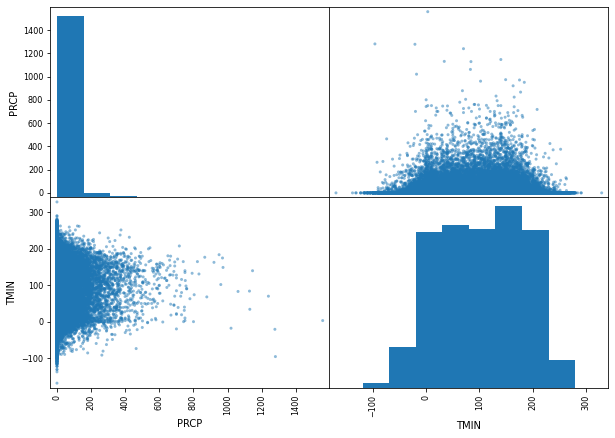

In [18]:
pd.plotting.scatter_matrix(df, figsize=[10,7])

<AxesSubplot:>

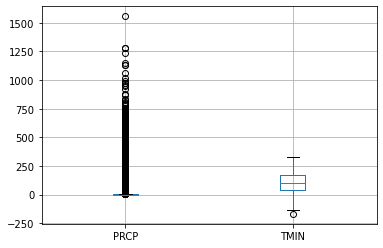

In [19]:
pd.plotting.boxplot(df)